# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.rand(4,3)
Y=torch.rand(4,3)

# 행으로 병합 코드
print(torch.cat([X,Y],dim=0))

# 열로 병합 코드
print(torch.cat([X,Y],dim=1))



tensor([[0.3074, 0.8503, 0.0271],
        [0.8564, 0.7704, 0.9145],
        [0.8537, 0.1611, 0.6051],
        [0.7683, 0.5212, 0.3013],
        [0.0694, 0.3725, 0.4985],
        [0.1514, 0.8853, 0.0539],
        [0.5384, 0.8236, 0.3487],
        [0.2493, 0.6230, 0.7918]])
tensor([[0.3074, 0.8503, 0.0271, 0.0694, 0.3725, 0.4985],
        [0.8564, 0.7704, 0.9145, 0.1514, 0.8853, 0.0539],
        [0.8537, 0.1611, 0.6051, 0.5384, 0.8236, 0.3487],
        [0.7683, 0.5212, 0.3013, 0.2493, 0.6230, 0.7918]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.8462, 0.5364]) 
label: tensor([7.2297])


In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
      batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
      yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 2.3509, -1.4205],
        [-0.0069, -0.2305],
        [ 0.8819, -0.0612],
        [-0.4249,  1.5044],
        [ 0.6045,  0.2634],
        [ 0.2110, -0.1383],
        [ 1.2011,  0.0182],
        [ 0.6955,  0.9372],
        [-0.6330,  0.5456],
        [-0.5493, -1.0157],
        [-1.4915, -0.4175],
        [-0.2624, -1.4952],
        [-1.5593,  0.4656],
        [-1.0814, -0.5094],
        [-1.1593, -1.4924],
        [ 0.0825, -0.7851],
        [-0.0060,  1.4781],
        [ 0.1951,  0.4181],
        [-0.5481, -0.5489],
        [ 0.1420,  1.4329]]) 
 tensor([[14.7066],
        [ 5.8151],
        [ 8.2245],
        [ 1.9736],
        [ 6.9292],
        [ 6.3381],
        [ 9.0807],
        [ 6.1854],
        [ 2.7675],
        [ 5.3886],
        [ 1.6602],
        [ 6.9687],
        [ 0.1114],
        [ 3.0187],
        [ 4.2740],
        [ 6.9452],
        [ 3.2510],
        [ 5.4478],
        [ 4.6849],
        [ 3.7838]])


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.5], requires_grad=True)#원하는 실수를 넣어주세요

In [10]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    """Squared loss."""
    torch.reshape(y,y_hat.shape)
    loss = (y_hat - y)**2
    return loss.mean()

In [12]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [13]:
lr = 0.03
num_epochs = 20
net = linreg
loss = squared_loss

w1 = []
w2 = []
loss_y = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w1.append(w[0].item())
        w2.append(w[1].item())
        loss_y.append(float(train_l.mean()))

epoch 1, loss 14.898192
epoch 2, loss 8.188924
epoch 3, loss 4.501945
epoch 4, loss 2.475450
epoch 5, loss 1.361463
epoch 6, loss 0.748963
epoch 7, loss 0.412121
epoch 8, loss 0.226841
epoch 9, loss 0.124902
epoch 10, loss 0.068803
epoch 11, loss 0.037928
epoch 12, loss 0.020934
epoch 13, loss 0.011577
epoch 14, loss 0.006423
epoch 15, loss 0.003583
epoch 16, loss 0.002019
epoch 17, loss 0.001156
epoch 18, loss 0.000681
epoch 19, loss 0.000419
epoch 20, loss 0.000274


In [14]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0089, -0.0020], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0093], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

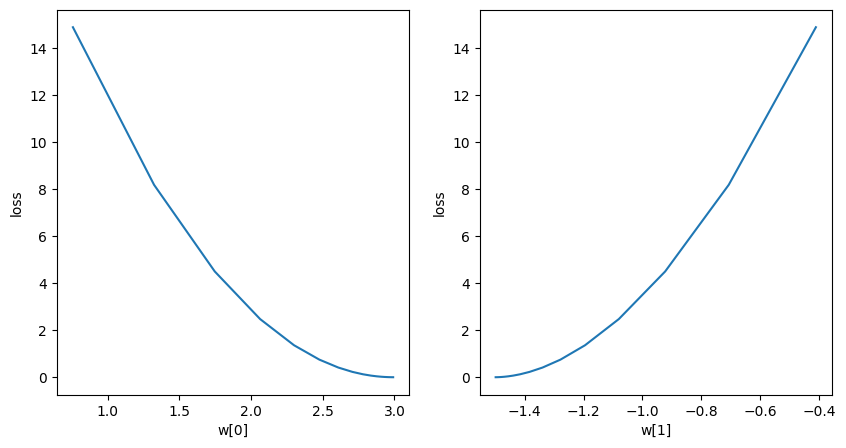

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(w1,loss_y)
plt.xlabel('w[0]')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(w2,loss_y)
plt.xlabel('w[1]')
plt.ylabel('loss')

plt.show()


### Concise Implementation of Linear Regression
- API 사용해보기

In [16]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [17]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [18]:
next(iter(data_iter))

[tensor([[-0.6566,  0.3342],
         [ 0.3523, -0.0858],
         [-0.3223, -0.7452],
         [-0.2081, -0.0668],
         [ 0.5366, -1.1420],
         [-0.2542,  0.7247],
         [ 0.0279, -0.3618],
         [-0.1877, -0.7716],
         [-0.3305, -1.7889],
         [-0.9708,  0.3245],
         [ 0.9285,  0.2289],
         [ 0.2131,  0.4714],
         [ 1.2059,  0.3463],
         [ 0.8546, -0.6193],
         [-0.2000, -2.1282],
         [-0.3761, -0.8118],
         [-1.0609,  1.0343],
         [ 1.2116,  1.4128],
         [-0.4286, -1.2691],
         [ 0.6110, -0.0293]]),
 tensor([[3.0431],
         [6.6894],
         [5.6414],
         [4.9522],
         [8.8178],
         [3.6637],
         [6.1268],
         [6.0915],
         [7.1814],
         [2.1004],
         [7.9594],
         [5.4351],
         [8.5880],
         [8.9776],
         [8.0729],
         [5.5874],
         [0.7688],
         [7.0201],
         [6.1189],
         [7.3740]])]

In [19]:
from torch import nn

net = nn.Sequential(nn.LazyLinear(1))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [20]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([])

In [21]:
loss = nn.MSELoss()

In [22]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [23]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000242
epoch 2, loss 0.000102
epoch 3, loss 0.000102


In [24]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0001,  0.0003])
error in estimating b: tensor([0.0002])
